1.4 K Nearest Neighbors

Calculates the distance between the test point (test observation) and all the points in the train set. The most common distance metric to use is the euclidean distance:

d(p, q) = sqrt((q1-p1)^2 + (q2-p2)^2 + ... + (qN-pN)^2)

Then, it identifies the K closest train neighbors based on the calculated distance. Those points are called "the nearest neighbors". KNN then counts the nearest neighbors classifications for each class, and finally the predicted class for the new test point is decided based on vote majority.

In [32]:
%%capture
%run preprocessing.ipynb

In [33]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Create a list to store results for each trained model
knn_data = []

# Iterate over different values of n_neighbors (here we are considering 20 values max)
# Using the default distance metric (Minkowski) and p=2 (Euclidean distance)    
for i in range(1, 21):
    # Create and train the K Neighbors Classifier model
    model = KNeighborsClassifier(n_neighbors=i, metric ='manhattan')
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics for the model
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted') 
    
    knn_data.append({'Neighbors': i, 'Recall': recall, 'Precision': precision, 'F1': f1})

# Convert the list of results to a DataFrame
knn_df = pd.DataFrame(knn_data)

# Display the DataFrame
print(knn_df)


    Neighbors    Recall  Precision        F1
0           1  0.967158   0.967084  0.967079
1           2  0.963245   0.964042  0.963408
2           3  0.968242   0.968224  0.968182
3           4  0.966434   0.966743  0.966480
4           5  0.967059   0.967147  0.967021
5           6  0.966336   0.966587  0.966358
6           7  0.966270   0.966379  0.966230
7           8  0.965415   0.965660  0.965423
8           9  0.965119   0.965298  0.965095
9          10  0.964100   0.964375  0.964112
10         11  0.963969   0.964180  0.963948
11         12  0.963706   0.963985  0.963713
12         13  0.963213   0.963433  0.963192
13         14  0.962917   0.963203  0.962922
14         15  0.962358   0.962597  0.962340
15         16  0.962424   0.962722  0.962430
16         17  0.961996   0.962254  0.961977
17         18  0.961832   0.962126  0.961830
18         19  0.961766   0.962036  0.961749
19         20  0.961503   0.961824  0.961509


In [34]:
# See the best model is for n_neighbors = 3 

knn_df = knn_df.sort_values(by='F1', ascending = False)
knn_df.head()

,Neighbors,Recall,Precision,F1
2,3,0.968242,0.968224,0.968182
0,1,0.967158,0.967084,0.967079
4,5,0.967059,0.967147,0.967021
3,4,0.966434,0.966743,0.966480
5,6,0.966336,0.966587,0.966358


In [35]:
# Using n_neighbors = 3 

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3, metric='manhattan') 
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

from sklearn.metrics import recall_score
knn_score = recall_score(y_test, y_pred, average='weighted')
print(knn_score)

0.968242488000526


<Axes: >

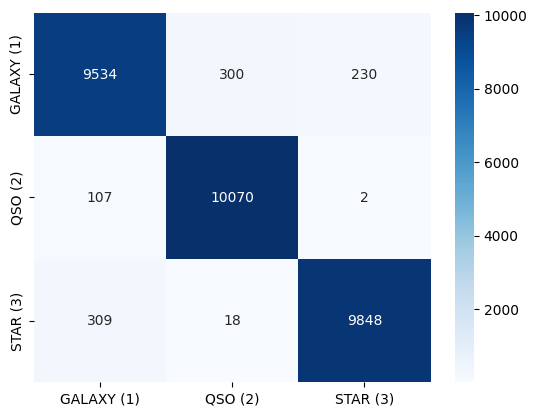

In [36]:
# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create a list of labels
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
